In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime
import seaborn as sns

In [55]:
data = "fires_week.csv"
fires_data = pd.read_csv(data)

In [56]:
fires_data.head()

,latitude,longitude,altitude,geometry,pull_date,fire_name,fire_number,area,report_date,dayof_pull
0,26.177,-81.314,NaN,Point,5/3/2009,Deep,FL-BCP-009021,30005.0,5/2/2009,1
1,31.420,-99.813,NaN,Point,5/3/2009,2009_Winter_Initial_Attack,TX-TXS-990019,16446.0,5/2/2009,1
2,28.565,-81.089,NaN,Point,5/3/2009,Harley,FL-FLS-2009-12-0234,1200.0,5/2/2009,1
3,29.630,-82.732,NaN,Point,5/3/2009,GILCHRIST,FL-FLS-2009-08-0434,300.0,5/2/2009,1
4,28.797,-80.903,NaN,Point,5/3/2009,CANAL,FL-FLS-2009-10-0273,276.0,5/2/2009,1


In [57]:
fires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 10 columns):
latitude       2457 non-null float64
longitude      2457 non-null float64
altitude       0 non-null float64
geometry       2457 non-null object
pull_date      2457 non-null object
fire_name      2457 non-null object
fire_number    2457 non-null object
area           2457 non-null float64
report_date    2457 non-null object
dayof_pull     2457 non-null int64
dtypes: float64(4), int64(1), object(5)
memory usage: 192.1+ KB


In [58]:
fires_data.columns

Index(['latitude', 'longitude', 'altitude', 'geometry', 'pull_date',
       'fire_name', 'fire_number', 'area', 'report_date', 'dayof_pull'],
      dtype='object')

In [59]:
fire = fires_data[['latitude', 'longitude', 'geometry',
       'fire_name', 'fire_number', 'area', 'report_date']].copy()
fire.head()

,latitude,longitude,geometry,fire_name,fire_number,area,report_date
0,26.177,-81.314,Point,Deep,FL-BCP-009021,30005.0,5/2/2009
1,31.420,-99.813,Point,2009_Winter_Initial_Attack,TX-TXS-990019,16446.0,5/2/2009
2,28.565,-81.089,Point,Harley,FL-FLS-2009-12-0234,1200.0,5/2/2009
3,29.630,-82.732,Point,GILCHRIST,FL-FLS-2009-08-0434,300.0,5/2/2009
4,28.797,-80.903,Point,CANAL,FL-FLS-2009-10-0273,276.0,5/2/2009


In [60]:
fire = fire.rename(columns={"area":"acres"})
fire.head()

,latitude,longitude,geometry,fire_name,fire_number,acres,report_date
0,26.177,-81.314,Point,Deep,FL-BCP-009021,30005.0,5/2/2009
1,31.420,-99.813,Point,2009_Winter_Initial_Attack,TX-TXS-990019,16446.0,5/2/2009
2,28.565,-81.089,Point,Harley,FL-FLS-2009-12-0234,1200.0,5/2/2009
3,29.630,-82.732,Point,GILCHRIST,FL-FLS-2009-08-0434,300.0,5/2/2009
4,28.797,-80.903,Point,CANAL,FL-FLS-2009-10-0273,276.0,5/2/2009


In [61]:
fire['report_year'] = pd.DatetimeIndex(fire['report_date']).year
fire.head()

,latitude,longitude,geometry,fire_name,fire_number,acres,report_date,report_year
0,26.177,-81.314,Point,Deep,FL-BCP-009021,30005.0,5/2/2009,2009
1,31.420,-99.813,Point,2009_Winter_Initial_Attack,TX-TXS-990019,16446.0,5/2/2009,2009
2,28.565,-81.089,Point,Harley,FL-FLS-2009-12-0234,1200.0,5/2/2009,2009
3,29.630,-82.732,Point,GILCHRIST,FL-FLS-2009-08-0434,300.0,5/2/2009,2009
4,28.797,-80.903,Point,CANAL,FL-FLS-2009-10-0273,276.0,5/2/2009,2009


In [ ]:
fire['report_year'] = pd.DatetimeIndex(fire['report_date']).year
fire.head()

In [62]:
fire["State"] = fire["fire_number"].str[:2]
fire.head()

,latitude,longitude,geometry,fire_name,fire_number,acres,report_date,report_year,State
0,26.177,-81.314,Point,Deep,FL-BCP-009021,30005.0,5/2/2009,2009,FL
1,31.420,-99.813,Point,2009_Winter_Initial_Attack,TX-TXS-990019,16446.0,5/2/2009,2009,TX
2,28.565,-81.089,Point,Harley,FL-FLS-2009-12-0234,1200.0,5/2/2009,2009,FL
3,29.630,-82.732,Point,GILCHRIST,FL-FLS-2009-08-0434,300.0,5/2/2009,2009,FL
4,28.797,-80.903,Point,CANAL,FL-FLS-2009-10-0273,276.0,5/2/2009,2009,FL


In [63]:
fire.agg(['count', 'size', 'nunique'])

,latitude,longitude,geometry,fire_name,fire_number,acres,report_date,report_year,State
count,2457,2457,2457,2457,2457,2457,2457,2457,2457
size,2457,2457,2457,2457,2457,2457,2457,2457,2457
nunique,1711,1731,1,1706,1785,1551,308,5,39


In [64]:
year_group = fire.groupby('report_year').agg({'acres':'sum'})
year_group

,acres
report_year,
2009,6155792.0
2010,2275737.7
2011,15492113.6
2012,15410817.0
2013,6966398.3


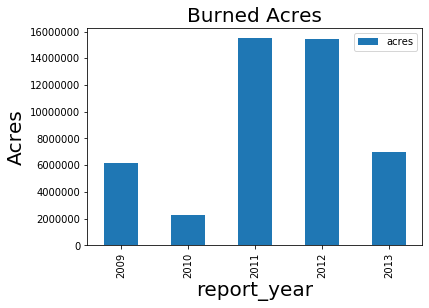

In [65]:
f = plt.figure()

plt.ticklabel_format(style = 'plain')

plt.title('Burned Acres', fontsize=20)
plt.ylabel("Acres",fontsize=20)
plt.xlabel("Years",fontsize=20)
year_group.plot(kind='bar', ax=f.gca())
plt.show()

In [74]:
state = fire.groupby('State').agg({'acres':'sum'}).sort_values(by=['acres'], ascending=False)
state[:10]

,acres
State,
AK,7204141.4
ID,6902203.0
CA,4318183.0
NM,4167621.0
TX,3846845.0
GA,3419743.0
AZ,3178824.0
OR,2652106.4
MT,1726283.0


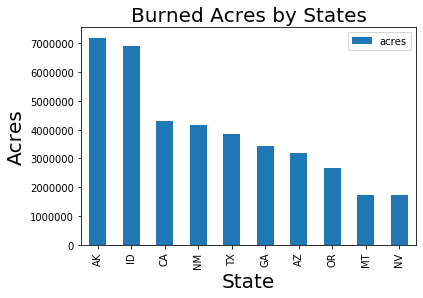

In [77]:
f = plt.figure()

plt.ticklabel_format(style = 'plain')

plt.title('Burned Acres by States', fontsize=20)
plt.ylabel("Acres",fontsize=20)
plt.xlabel("Years",fontsize=20)
state[:10].plot(kind='bar', ax=f.gca())
plt.show()

In [96]:
week = fire.groupby('report_date').agg({'acres':'sum'}).sort_values(by=['acres'], ascending=False)
week_sort = week[:15]
week_sort

,acres
report_date,
6/25/2011,1434628.0
8/18/2012,1400044.0
7/14/2012,1323153.0
8/8/2009,1286717.0
6/18/2011,1271600.0
8/11/2012,1255121.0
8/15/2009,1241598.0
7/2/2011,1176355.0
6/11/2011,1139164.0


In [97]:
w = week_sort.sort_values(by='report_date')
w

,acres
report_date,
6/11/2011,1139164.0
6/18/2011,1271600.0
6/25/2011,1434628.0
6/29/2013,864427.0
7/14/2012,1323153.0
7/2/2011,1176355.0
7/7/2012,823885.0
8/11/2012,1255121.0
8/15/2009,1241598.0


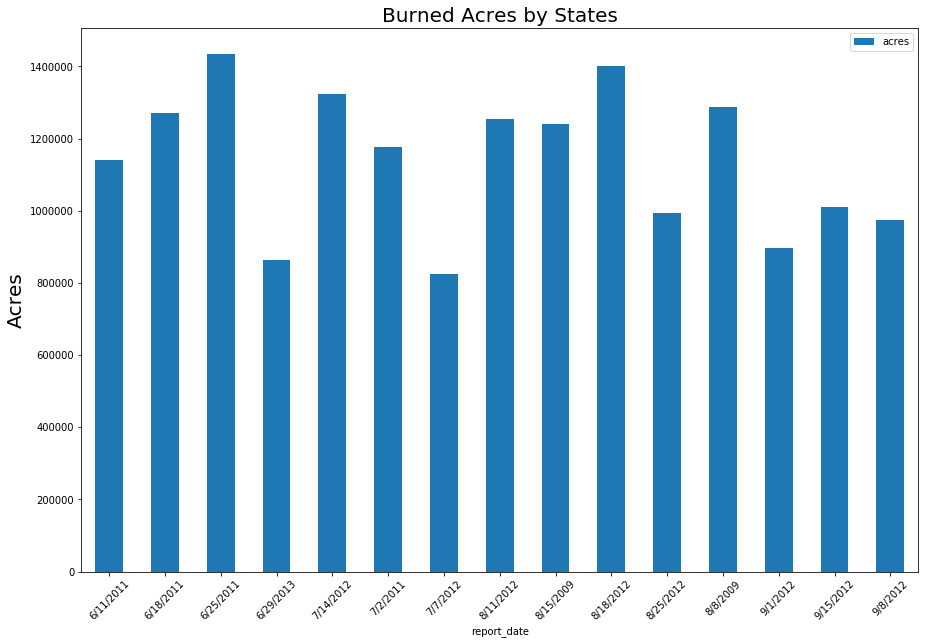

In [103]:
f = plt.figure()

plt.ticklabel_format(style = 'plain')

plt.title('Burned Acres by States', fontsize=20)
plt.ylabel("Acres",fontsize=20)
w.plot(kind='bar', rot=45, figsize=(15,10), ax=f.gca())
plt.show()